In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

model.fit(X1,y1)
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [4]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
(accuracy_score(y1,y1_model),accuracy_score(y2,y2_model) )


(0.96, 0.9066666666666666)

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [7]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)




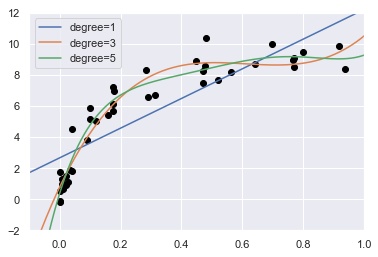

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Text(0, 0.5, 'score')

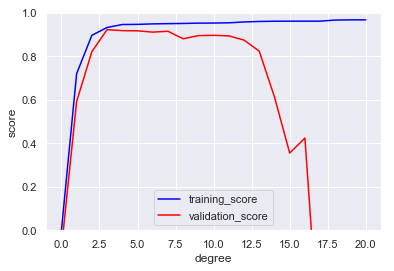

In [14]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree',
                                         degree, cv=7)
plt.plot(degree, np.median(train_score, axis=1), color = 'blue', label = 'training_score')
plt.plot(degree, np.median(val_score, axis=1), color = 'red', label = 'validation_score')
plt.legend()
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

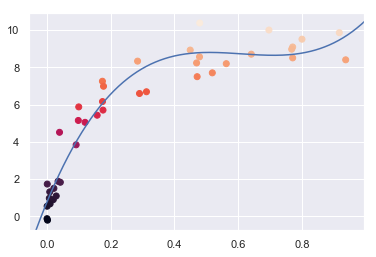

In [16]:
plt.scatter(X.ravel(), y, c=y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

### Learning Curves


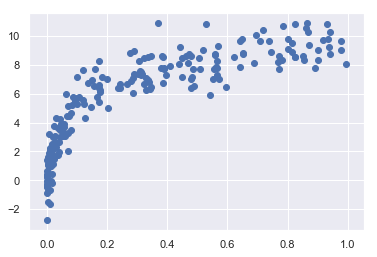

In [21]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

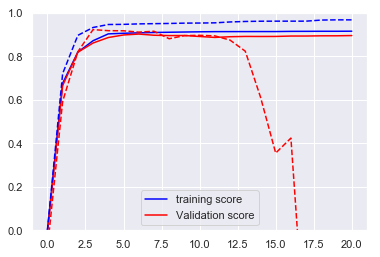

In [24]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                           'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
        label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color='red',
        label = 'Validation score')
plt.plot(degree, np.median(train_score, 1), color='blue',
        ls='dashed')
plt.plot(degree, np.median(val_score, 1), color='red',
        ls='dashed')
plt.ylim(0,1)
plt.legend()

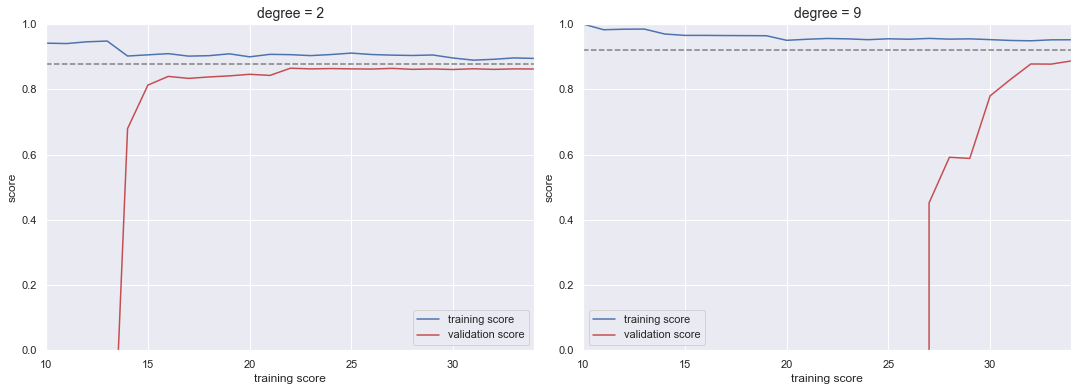

In [43]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left = 0.06, right = 0.95, wspace=0.1)

for i, degree in enumerate([2,9]):
    N, train_lc, val_lc =learning_curve(PolynomialRegression(degree), X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='b', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='r', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training score')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {}'.format(degree), size=14)
    ax[i].legend()